# Pymaceuticals
Pymaceuticals Exercise
written by: A.Lam

# Analysis
- Observation 1: Only two drugs: Capomulin and Ramicane result in reduced tumor volume. 
- Observation 2: It is no surprise that the two drugs that reduced tumor volume had the highest survival rate after the 45-day treatment program. Propriva had the lowest survival rate.
- Observation 3: Generally, none of the drugs were successful at preventing an increase of metastatic sites over time. However, Ramicane was able to slow the increase in sites the most.

# Setup

In [1]:
# Modules
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import raw data
clin_data_path = os.path.join('..','Instructions','Pymaceuticals','raw_data','clinicaltrial_data.csv')
mouse_data_path = os.path.join('..','Instructions','Pymaceuticals','raw_data','mouse_drug_data.csv')
clin_data = pd.read_csv(clin_data_path)
mouse_data = pd.read_csv(mouse_data_path)

In [3]:
clin_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
combined = pd.merge(clin_data,mouse_data,on='Mouse ID')
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [6]:
drug_types = combined['Drug'].unique()
# err_calc = lambda x: x*1.96 # 1.96 corresponds to z for 95% CI
padding = 20 # space for legend

# Tumor Response to Treatment
Tumor volume v. time, group by Drug

In [7]:
tumor_response = pd.concat([combined[['Mouse ID','Timepoint']], 
                            combined[['Tumor Volume (mm3)','Drug']].pivot(columns='Drug',values='Tumor Volume (mm3)')],
                           axis = 1).groupby(['Timepoint']).mean()
tumor_sem = pd.concat([combined[['Mouse ID','Timepoint']], 
                            combined[['Tumor Volume (mm3)','Drug']].pivot(columns='Drug',values='Tumor Volume (mm3)')],
                           axis = 1).groupby(['Timepoint']).sem()
tumor_sem.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Mouse ID,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,NaN,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,NaN,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,NaN,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,NaN,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


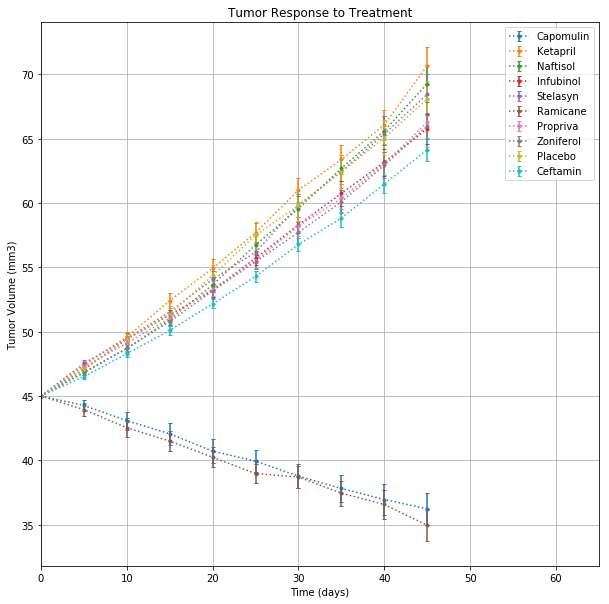

In [8]:
plt.figure(figsize = (10,10))
for i in range(len(drug_types)):
    this_x = tumor_response.index.values
    this_y = tumor_response[drug_types[i]]
    this_err = tumor_sem[drug_types[i]]
    plt.errorbar(this_x,this_y,yerr = this_err, 
                 label = drug_types[i], linestyle=':', 
                 fmt='.--', capsize = 2)
    
plt.legend(loc = 'best')
plt.xlim([0,max(tumor_response.index.values) + padding])
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.grid(True)
plt.show()

# Metastatic Response to Treatment
Met. Sites v. Treatment Duration (Days), group by Drug

In [9]:
met_response = pd.concat([combined[['Mouse ID','Timepoint']], 
                            combined[['Metastatic Sites','Drug']].pivot(columns='Drug',values='Metastatic Sites')],
                           axis = 1).groupby(['Timepoint']).mean()
met_sem = pd.concat([combined[['Mouse ID','Timepoint']], 
                            combined[['Metastatic Sites','Drug']].pivot(columns='Drug',values='Metastatic Sites')],
                           axis = 1).groupby(['Timepoint']).sem()
met_response.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


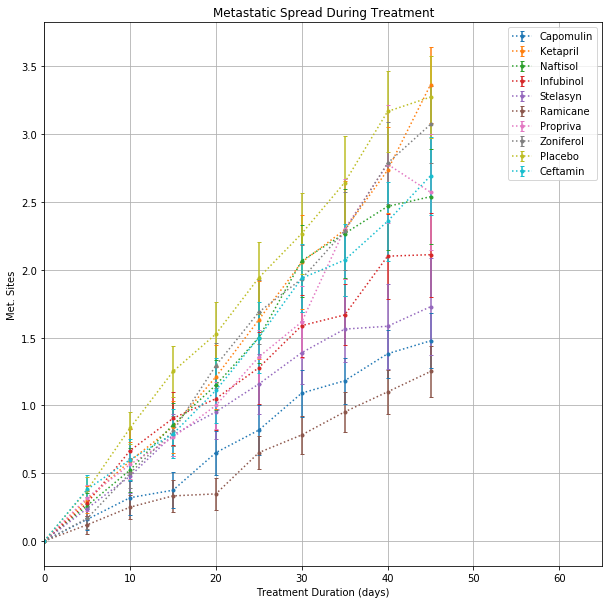

In [10]:
plt.figure(figsize = (10,10))
for i in range(len(drug_types)):
    this_x = met_response.index.values
    this_y = met_response[drug_types[i]]
    this_err = met_sem[drug_types[i]]
    plt.errorbar(this_x,this_y,yerr = this_err, 
                 label = drug_types[i], linestyle=':', 
                 fmt='.--', capsize = 2)
    
plt.legend(loc = 'best')
plt.xlim([0,max(met_response.index.values) + padding])
plt.xlabel('Treatment Duration (days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
plt.grid(True)
plt.show()

# Survival Rates
Survival Rate (%) vs. Time (days), group by Drug

In [11]:
mouse_count = pd.concat([combined['Timepoint'], 
                            combined[['Mouse ID','Drug']].pivot(columns='Drug',values='Mouse ID')],
                           axis = 1).groupby(['Timepoint']).nunique()
mouse_count.drop(['Timepoint'], axis = 1,inplace = True)
mouse_count.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


In [12]:
mouse_pct = 100 * mouse_count / mouse_count.iloc[0,:]

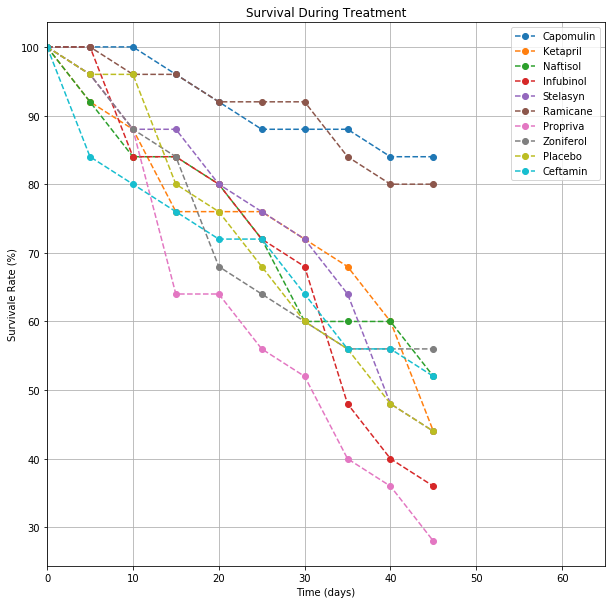

In [13]:
plt.figure(figsize = (10,10))
for i in range(len(drug_types)):
    this_x = mouse_pct.index.values
    this_y = mouse_pct[drug_types[i]]
    plt.plot(this_x,this_y,'o--',
                 label = drug_types[i])
    
plt.legend(loc = 'best')
plt.xlim([0,max(mouse_pct.index.values) + padding])
plt.xlabel('Time (days)')
plt.ylabel('Survivale Rate (%)')
plt.title('Survival During Treatment')
plt.grid(True)
plt.show()

# Summary Bar Graph
% Tumor volume change by drug over 45 day treatment (bar chart)

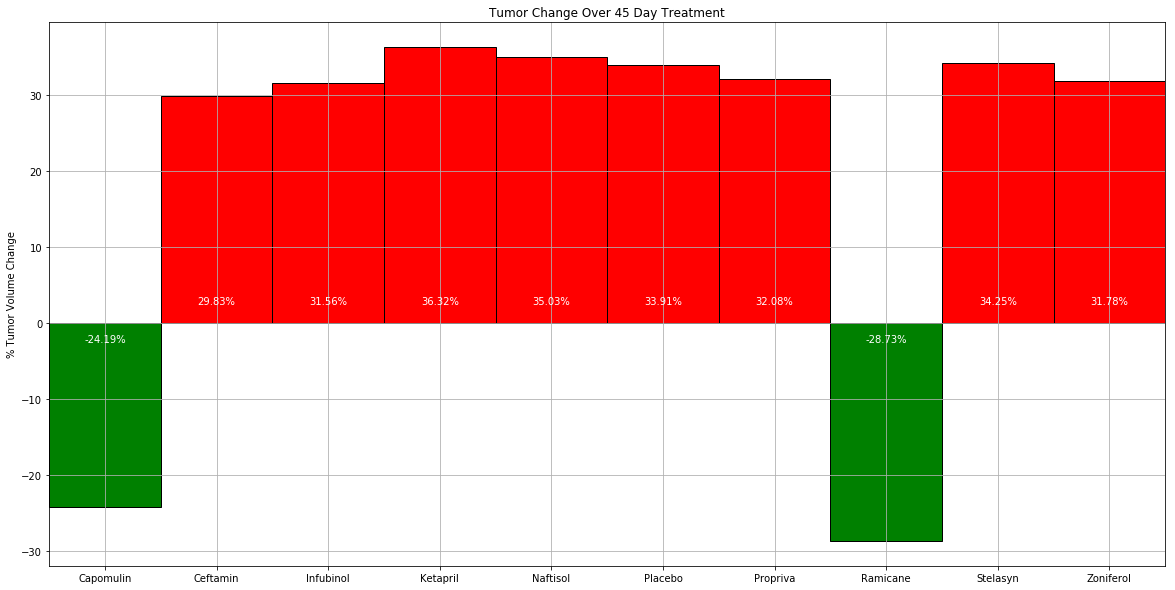

In [14]:
treatment_result_pct = 100*(tumor_response.iloc[-1,:] - tumor_response.iloc[0,:]) / tumor_response.iloc[-1,:]
plt.figure(figsize = (20,10))
x = [y for y in range(len(treatment_result_pct.index.values))]
placement = [-1 if y < 0 else 1 for y in treatment_result_pct]
result_colors = ['g' if result < 0 else 'r' for result in treatment_result_pct]
plt.bar(x,treatment_result_pct, tick_label = treatment_result_pct.index.values, 
       color = result_colors, edgecolor = ['k' for y in range(len(treatment_result_pct.index.values))],
       width = 1)
plt.xlim([-0.5,len(treatment_result_pct.index.values)-0.5])
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')
plt.grid(True)
for i in range(len(treatment_result_pct.index.values)):
    plt.text(x[i],2.5 * placement[i],
             str(round(treatment_result_pct[i],2)) + '%',
             ha = 'center', color = 'w')
plt.show()